In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

In [4]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [5]:
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [9]:
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [7]:
df_DA_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


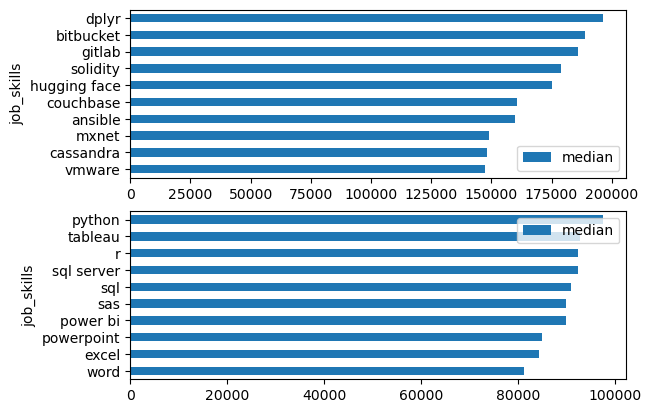

In [11]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis()

df_DA_skills.plot(kind='barh', y='median', ax=ax[1])
ax[1].invert_yaxis()

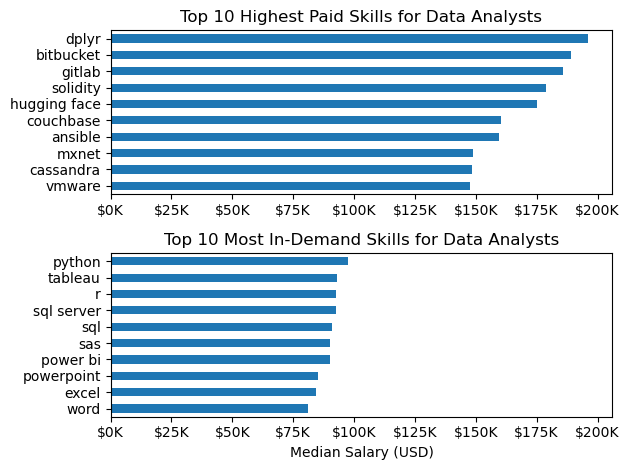

In [15]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()